In [137]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [138]:
# negativeBinomial Distribution (fails until rth success) with probability (p) of success realizing from a continuous uniform distribution between (0 and 1)

#parameters
r = 5 #number of successes per trial
p = 0.333 #probability of a single success

n = 1000000 #total number of uniform realizations
unif_num = np.random.uniform(0,1,n) #uniform realizations stored in an array

fails_until_success = [] #stores amount of fails before each success
trials = 0 #total trials

current_fails = 0
current_successes = 0

#if the value is less than p consider the realization a success
for i in range(n):

    if(p > unif_num[i]): #if success
        current_successes += 1
            
    else: #if fail
        current_fails +=1

    if(current_successes >= r):
        trials += 1 #increment trials
        fails_until_success.append(current_fails) #add the number of fails to the array
        current_fails = 0 #reset number of fails
        current_successes = 0 #reset number of successes       

x = Counter(fails_until_success) #store key value pairs in a dictionary

cutoff = n/10000 #the percentage that is too low to display

for j in x:

    if(x[j] > cutoff): #if not negligible
        x[j] = x[j] * (1/trials) #reformat as percentage
        last = j #last value above cutoff
    
    else:
        x[j] = 0 #set values below cutoff to 0


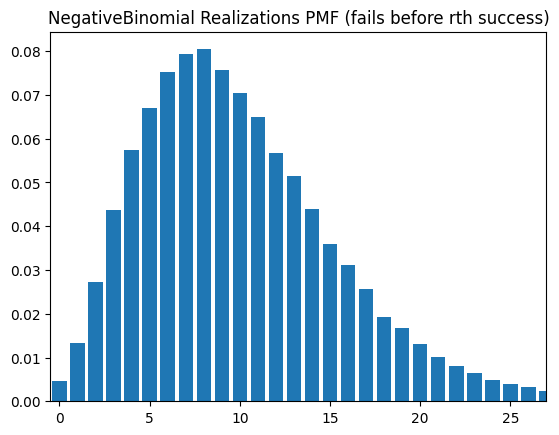

In [139]:
titles = list(x.keys()) #number of failures before rth success
heights = list(x.values()) #percentage of rth successes occuring at x

plt.title("NegativeBinomial Realizations PMF (fails before rth success)")
plt.bar(titles, heights)
plt.xlim(-0.5, last) #stops the x axis at the last value above cutoff

plt.show()